# Building A Handwritten Digits Classifier

## Goal:
To build a classifier using both regular classification methods and deep learning frame work

## Datasets:
Import the data directly from sklearn. Converting the data into a pandas DataFrame as a tabular representation is needed

**Note: This dataset is quite popular for a while for image classification purpose, but I never got my hands on it to test my own logics. I implemented deep learning along with other machgine learning algorithms against it, then check individual performance**

In [30]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

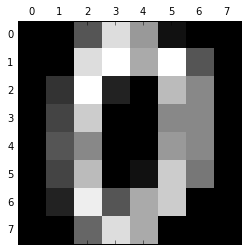

In [14]:
digits = load_digits()
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [22]:
data=digits.images
img=pd.DataFrame(data[0])
img.head()

,0,1,2,3,4,5,6,7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0
1,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0
2,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0
3,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0
4,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0


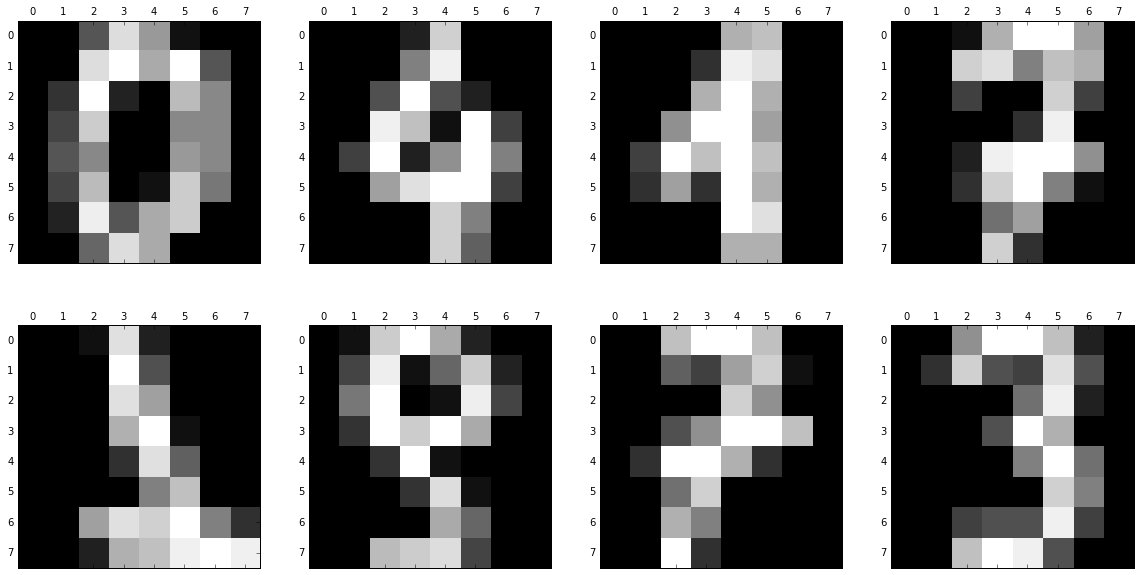

In [23]:
#Generate a Scatter plot grid, with 2 rows and 4 columns
fig=plt.figure(figsize=(20,10))
ax={}
for i in range(1,9,1):
    ax[i]=fig.add_subplot(2,4,i)
    
count=1

#Visualze images corresponding to certain number of rows
for row in [0,100,200,300,1000,1100,1200,1300]:
    img=pd.DataFrame(data[row])
    ax[count].matshow(img)
    count += 1
    
plt.show()
    

Convert images to a dataframe

In [24]:
df=pd.DataFrame(np.c_[digits['data']])
df['target']=digits['target']
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


Split the data

In [25]:
#Split data into train/test sets
df_shuffle=df.sample(frac=1).reset_index(drop=True)
bound=int(df_shuffle.shape[0]*0.8)

train=df[:bound]
test=df[bound:]

print("Length of trainset: ", len(train))
print("Length of testset: ", len(test))

Length of trainset:  1437
Length of testset:  360


## KNN

In [26]:
def knn_(trainset, testset, features, target, k):
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(train[features], train[target])
    predictions=knn.predict(test[features])
    score=accuracy_score(predictions, test[target])
    return score

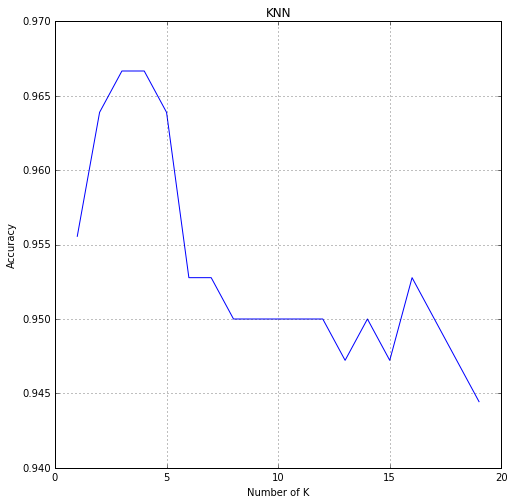

In [27]:
#Define features and target  for model development
target=['target']
features=[col for col in df.columns if col not in target]

accuracy_scores=[]

#Choose different k values to train&visualize results
for k in range(1,20,1):
    scores=knn_(train,test, features, target, k)
    accuracy_scores.append(scores)

plt.figure(figsize=(8,8))
plt.plot(range(1,20,1), accuracy_scores)
plt.grid(True)
plt.xlabel("Number of K")
plt.ylabel("Accuracy")
plt.title("KNN")
plt.show()

In [28]:
# Cross validation score
knn_cv=KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, df_shuffle[features], df_shuffle['target'], cv=5)
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.98901099 0.98895028 0.98885794 0.9859944  0.98028169]
cv_scores mean:0.9866190583745389


## Random Forest (With Grid Search)

In [31]:
hyperparameters = {"criterion": ["entropy", "gini"],
                   "max_depth": [5, 10,15,20,25,30, 35],
                   "max_features": ["log2", "sqrt"],
                   "min_samples_leaf": [1, 5],
                   "min_samples_split": [3, 5,7,9],
                   "n_estimators": [6, 9,12,15]
}

In [34]:
def rf_(trainset, testset, features, hyperparameters):
    
    #Initiate the classifier and grid search object
    rf=RandomForestClassifier()
    grid=GridSearchCV(rf, param_grid=hyperparameters, cv=10)
    grid.fit(trainset[features], trainset['target'])
    
    #Use the best combo to fit the data
    best_rf=grid.best_estimator_
    cv_scores = cross_val_score(best_rf, df_shuffle[features], df_shuffle['target'], cv=5)
    print("Best parameters: ", grid.best_params_)
    print("----------------------")
    print(cv_scores)
    print("cv_scores mean:{}".format(np.mean(cv_scores)))

In [35]:
rf_(train, test, features, hyperparameters)

Best parameters:  {'max_depth': 15, 'min_samples_leaf': 1, 'criterion': 'entropy', 'min_samples_split': 3, 'max_features': 'sqrt', 'n_estimators': 12}
----------------------
[0.97527473 0.95303867 0.94150418 0.96358543 0.94366197]
cv_scores mean:0.955412996717102


**Conclusion**
KNN (with 3 as the number of K) outerperforms Random Forest

## Deep Learning 

**Single Hidden Layers**

In [10]:
neurons=[8, 16, 32, 64, 128, 256]
activations=['relu', 'logistic']

accuracies_test=[]
accuracies_train=[]

for acfun in activations:
    for n in neurons:
        mlp=MLPClassifier(hidden_layer_sizes=(n,), activation=acfun)
        mlp.fit(train[features], train['target'])
        
        test_predictions=mlp.predict(test[features])
        accuracy_test=accuracy_score(test['target'], test_predictions)
        
        train_predictions=mlp.predict(train[features])
        accuracy_train=accuracy_score(train['target'], train_predictions)
        
        accuracies_test.append(accuracy_test)
        accuracies_train.append(accuracy_train)
        
        print("[{}] neuron:{}, accuracy_test:{}, accuracy_train:{}".format(acfun, n, accuracy_test,
                                                                                     accuracy_train))

[relu] neuron:8, accuracy_test:0.8444444444444444, accuracy_train:0.9749478079331941
[relu] neuron:16, accuracy_test:0.9055555555555556, accuracy_train:0.9951287404314544
[relu] neuron:32, accuracy_test:0.9111111111111111, accuracy_train:0.9993041057759221
[relu] neuron:64, accuracy_test:0.9055555555555556, accuracy_train:1.0
[relu] neuron:128, accuracy_test:0.9194444444444444, accuracy_train:1.0
[relu] neuron:256, accuracy_test:0.9277777777777778, accuracy_train:1.0
[logistic] neuron:8, accuracy_test:0.8277777777777777, accuracy_train:0.9791231732776617
[logistic] neuron:16, accuracy_test:0.8972222222222223, accuracy_train:0.9923451635351427
[logistic] neuron:32, accuracy_test:0.9083333333333333, accuracy_train:0.9993041057759221
[logistic] neuron:64, accuracy_test:0.9194444444444444, accuracy_train:1.0
[logistic] neuron:128, accuracy_test:0.9222222222222223, accuracy_train:1.0
[logistic] neuron:256, accuracy_test:0.9222222222222223, accuracy_train:1.0


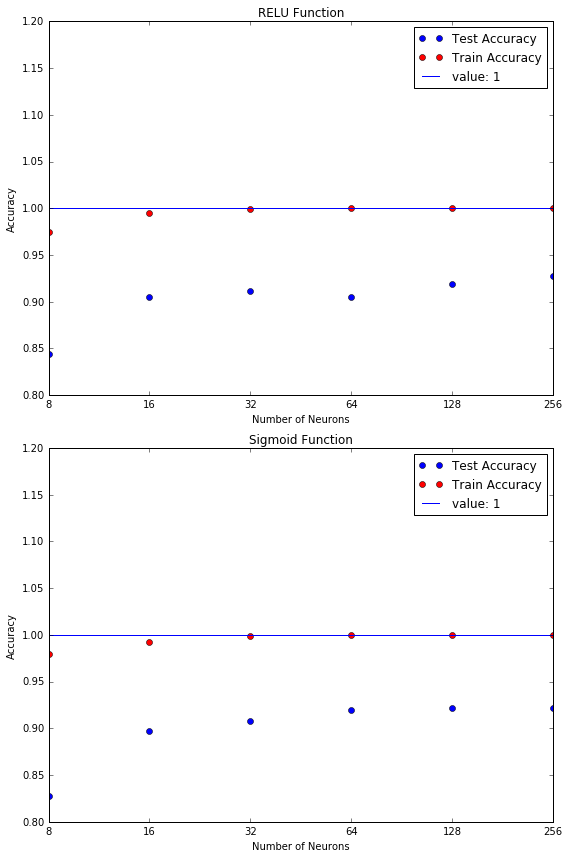

In [62]:
#PLot relu
n_neuron=[8, 16, 32, 64, 128, 256]

relu_test=accuracies_test[:6]
relu_train=accuracies_train[:6]

logistic_test=accuracies_test[6:]
logistic_train=accuracies_train[6:]

fig = plt.figure(figsize=(8,12)) 
fig.subplots_adjust(bottom=0.2)

ax0=fig.add_subplot(211)
ax1=fig.add_subplot(212)


#Plot accuracies for ReLU model
ax0.plot(range(1,7,1), relu_test,'bo',label='Test Accuracy')
ax0.plot(range(1,7,1), relu_train,'ro',label='Train Accuracy')
ax0.set_xticklabels(n_neuron)
ax0.set_ylim([0.8,1.2])
ax0.axhline(1,label='value: 1')
ax0.legend()
ax0.set_title("RELU Function")
ax0.set_xlabel("Number of Neurons")
ax0.set_ylabel("Accuracy")

#Plot out accuracies for Sigmoid model
ax1.plot(range(1,7,1), logistic_test,'bo',label='Test Accuracy')
ax1.plot(range(1,7,1), logistic_train,'ro',label='Train Accuracy')
ax1.set_xticklabels(n_neuron)
ax1.set_ylim([0.8,1.2])
ax1.axhline(1,label='value: 1')
ax1.legend()
ax1.set_title("Sigmoid Function")
ax1.set_xlabel("Number of Neurons")
ax1.set_ylabel("Accuracy")


plt.tight_layout()

**Conclusion**

By plot out accuracies score , we can see that 
- Model with "RELU" function starts to overfit with 64 neurons and more, because test accuracy starts to decrease while traning accuracy remain 1, which is the maximum value
- Model with "Sigmoid" function prones to overfitting with 256 and more neurons given that both test_accuracy and train_accuracy remain the same. 128 is the optimal option here

With only one hidden layer, sigmoid model beats relu model with higher accuracy without overfitting too much

**Try 3 layers with equal number of neurons per layer**

Only use three here is because using more hidden layers is known to increase the amount of overfitting, especially when dealing wih small datasets

In [36]:
#Try 2 hidden layers
activations=['relu', 'logistic']
neurons=[10,64,128,256]
accuracies=[]

for acfun in activations:
    for n in neurons:
        mlp=MLPClassifier(hidden_layer_sizes=(n,n,n), activation=acfun)
        accuracy=cross_val_score(mlp, df_shuffle[features], df_shuffle['target'], cv=4)
        accuracies.append(accuracy)
        print("[{}] neuron:{}, accuracy:{}, overall acuuracy: {:2f}".format(acfun, n, accuracy, accuracy.mean() ))

    

[relu] neuron:10, accuracy:[0.90969163 0.91796009 0.93736018 0.93707865], overall acuuracy: 0.925523
[relu] neuron:64, accuracy:[0.97356828 0.97339246 0.97315436 0.97078652], overall acuuracy: 0.972725
[relu] neuron:128, accuracy:[0.97797357 0.97560976 0.9753915  0.9752809 ], overall acuuracy: 0.976064
[relu] neuron:256, accuracy:[0.98898678 0.98004435 0.97315436 0.97752809], overall acuuracy: 0.979928
[logistic] neuron:10, accuracy:[0.63656388 0.73392461 0.46085011 0.67865169], overall acuuracy: 0.627498
[logistic] neuron:64, accuracy:[0.969163   0.96895787 0.97091723 0.95955056], overall acuuracy: 0.967147
[logistic] neuron:128, accuracy:[0.98017621 0.97560976 0.97091723 0.97078652], overall acuuracy: 0.974372
[logistic] neuron:256, accuracy:[0.98017621 0.98004435 0.97762864 0.96853933], overall acuuracy: 0.976597


**Conclusion**
Multiple-layer models are bettern than models with only single one layer. Relu Functions perform better than Sigmoid, and Model with more neurons per layer performs generally better than models with less neuron per layer.